### Import libraries

In [161]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import yaml

### Create directory structure

In [ ]:
!mkdir -p data

!mkdir -p experiments
!touch experiments/__init__.py
!mkdir -p experiments/transformers
!touch experiments/transformers/__init__.py
!mkdir -p experiments/classifiers
!touch experiments/classifiers/__init__.py

### Download the dataset

In [27]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ycVZxj_O_nUAa7lc-Dg5nwBPbDHonfOM' -O "data/california_housing.csv"

--2023-12-11 19:15:52--  https://docs.google.com/uc?export=download&id=1ycVZxj_O_nUAa7lc-Dg5nwBPbDHonfOM
Resolving docs.google.com (docs.google.com)... 2a00:1450:4003:806::200e, 216.58.215.174
Connecting to docs.google.com (docs.google.com)|2a00:1450:4003:806::200e|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3poi15vb4re23711vdpihh5i5dd8m65o/1702318500000/17600825180070349509/*/1ycVZxj_O_nUAa7lc-Dg5nwBPbDHonfOM?e=download&uuid=aa36a7e1-036e-45a3-af76-c05636f3d721 [following]
--2023-12-11 19:15:53--  https://doc-08-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3poi15vb4re23711vdpihh5i5dd8m65o/1702318500000/17600825180070349509/*/1ycVZxj_O_nUAa7lc-Dg5nwBPbDHonfOM?e=download&uuid=aa36a7e1-036e-45a3-af76-c05636f3d721
Resolving doc-08-c0-docs.googleusercontent.com (doc-08-c0-docs.googleusercontent.com)... 2a00:1450:4003:80d::2001, 1

### Load the dataset into a pandas dataframe

In [76]:
california_housing_df = pd.read_csv("data/california_housing.csv")

california_housing_df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

### Add a yaml description of the dataset

In [30]:
yaml_content = {
    'name': 'California Housing Dataframe',
    'description': 'This is a dataframe containing the California Housing dataset.',
    'num_rows': len(california_housing_df),
    'num_columns': len(california_housing_df.columns),
    'columns': list(california_housing_df.columns)
}

with open('data/california_housing.desc.yaml', 'w') as file:
    yaml.dump(yaml_content, file, sort_keys=False)

### Describe and get info about the data

In [31]:
california_housing_df.info()

california_housing_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

### Make pair plot of data columns

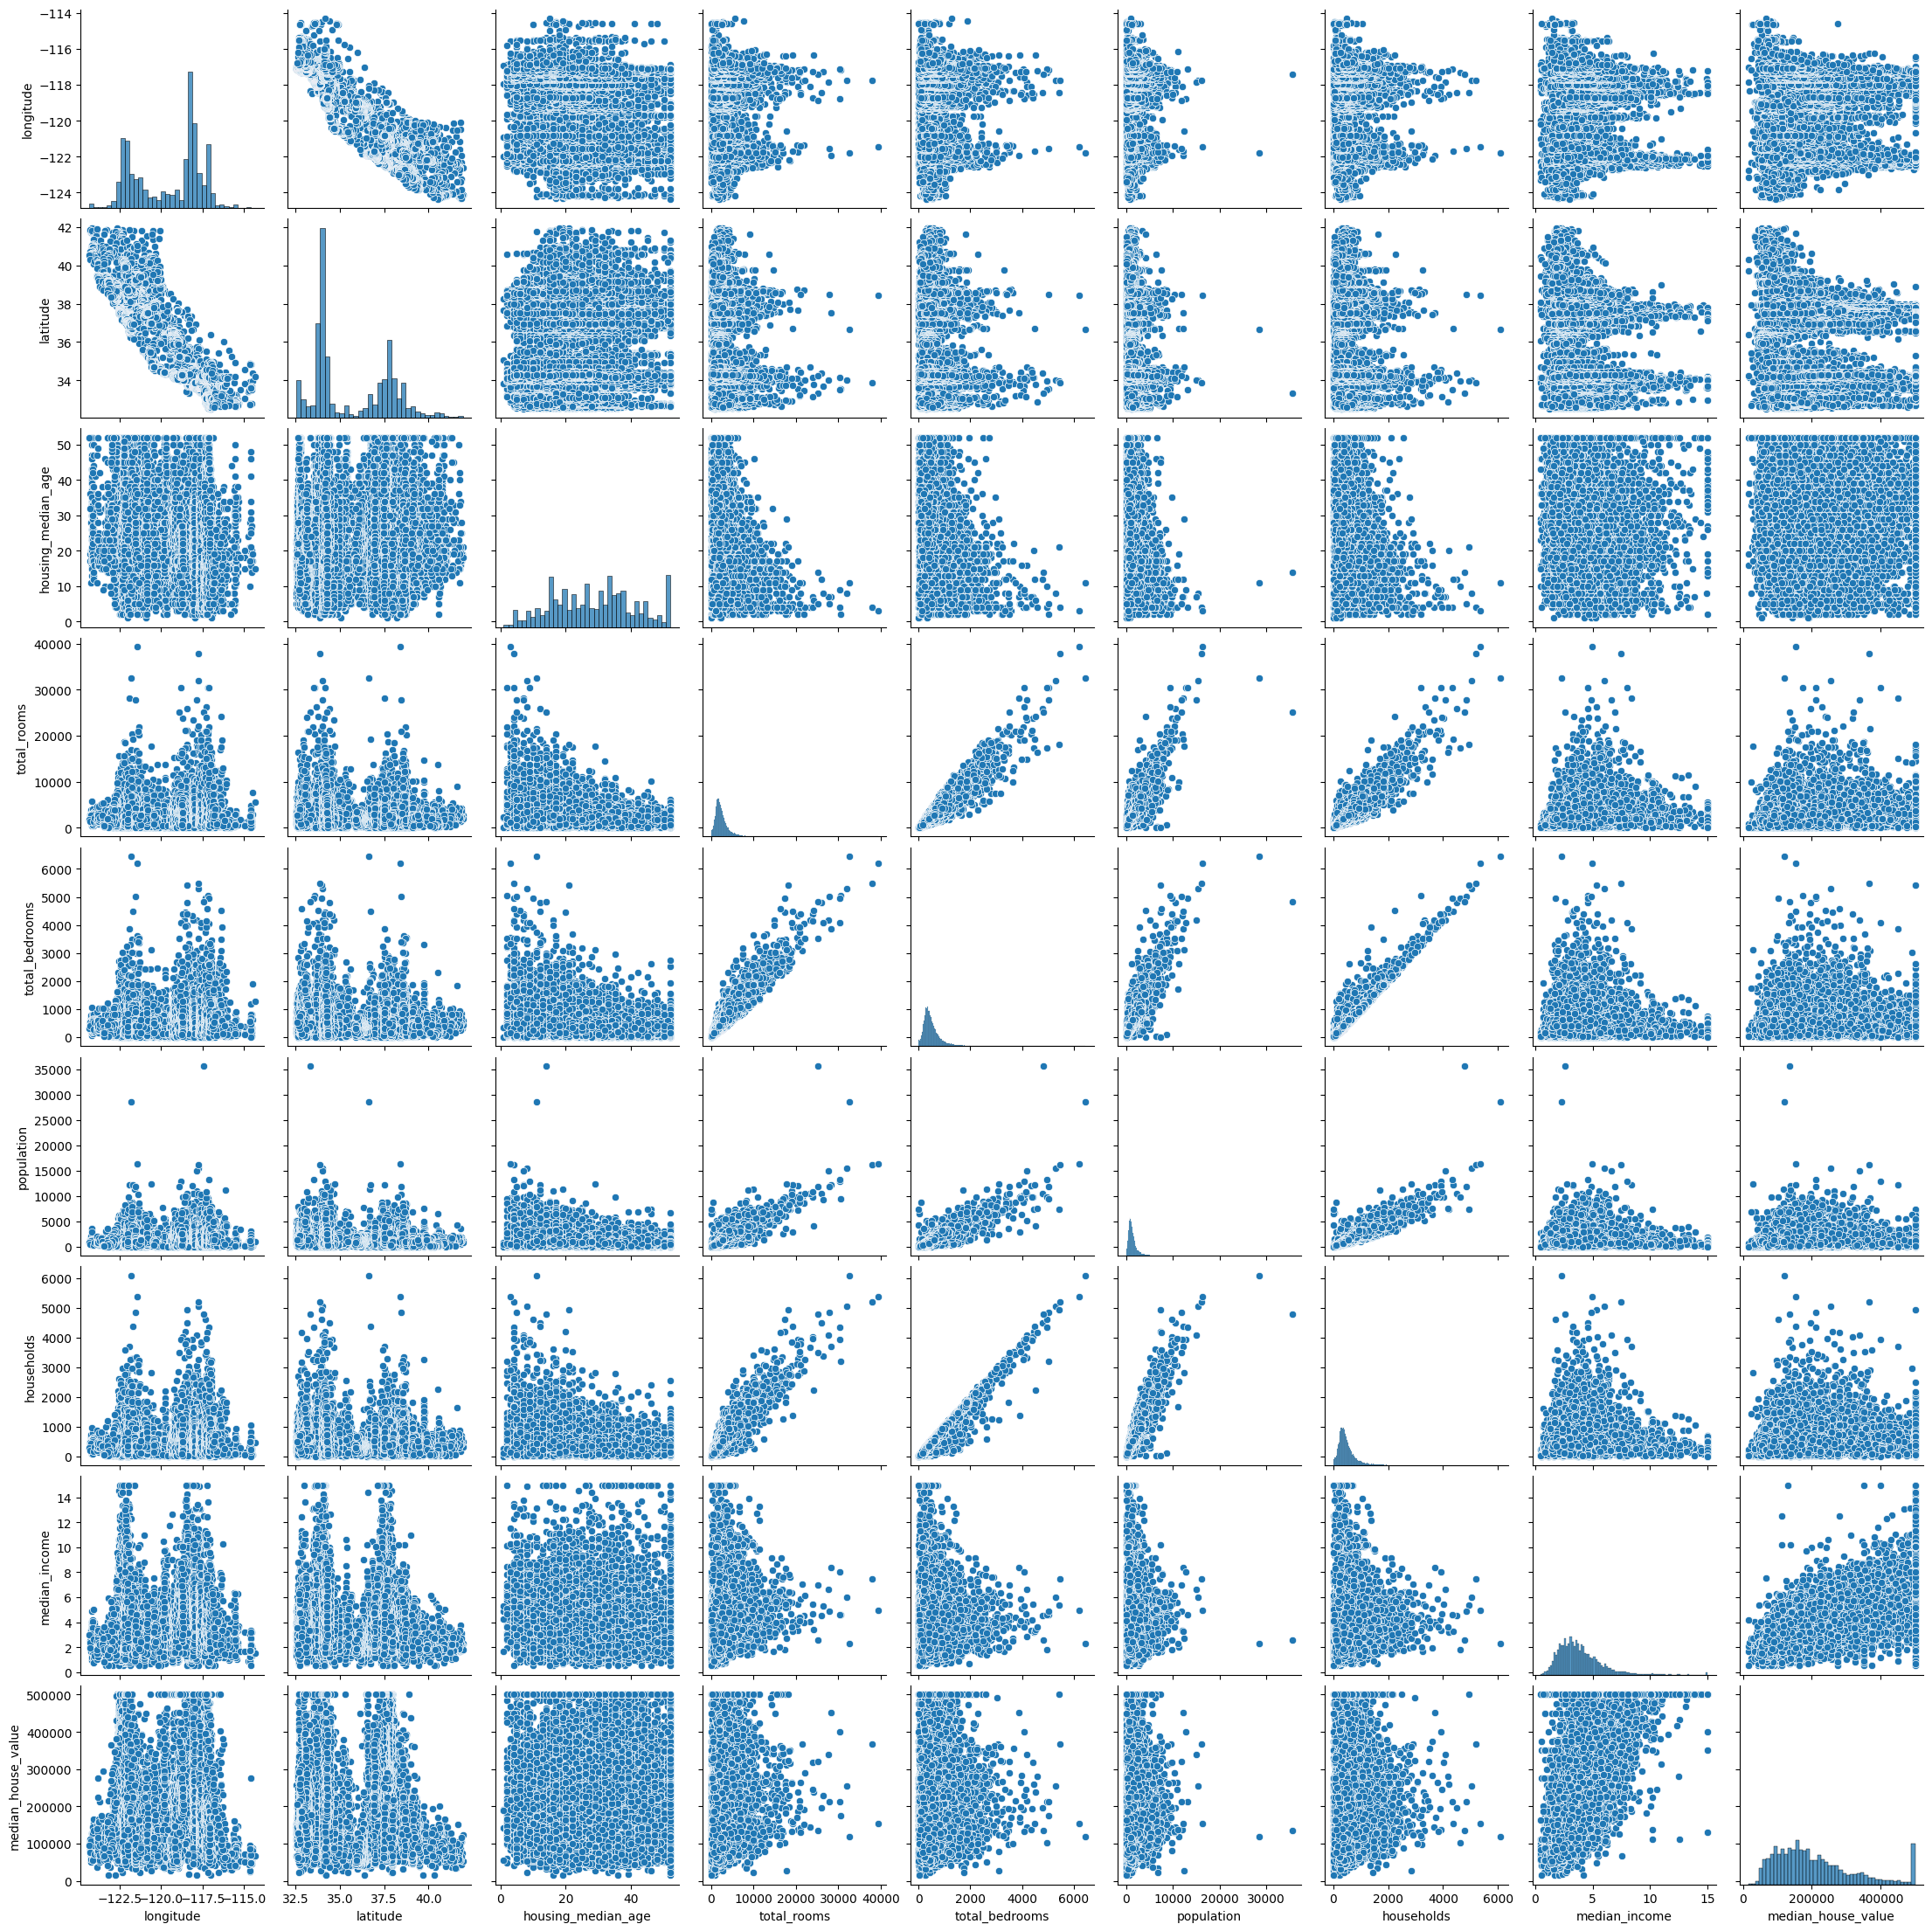

In [32]:
sns.pairplot(california_housing_df)

### Add log transform of data columns

In [87]:
california_housing_with_log_df = california_housing_df.copy()

log_cols = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

for col in log_cols:
    california_housing_with_log_df[f"log_{col}"] = np.log(california_housing_with_log_df[col])

california_housing_with_log_df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  log_housing_median_age  log_total_rooms  \
0            NEAR BAY                3.713572         6.779922   
1            NEAR BAY                3.044522         8.867709   
2            NEAR BAY                3.951244         7.290975   
3            NEAR BAY                3.951244         7.149917   
4            NEAR BAY                3.951244         7.394493   
...               ...                     ...              ...   
20635          INLAND                3.218876         7.417580   
20636          INLAND                2.890372         6.546785   
20637          INLAND                2.833213         7.720462   
20638          INLAND                2.890372         7.528332   
20639          INLAND                2.772589         7.932003   

       log_total_bedrooms  log_population  log_households  log_median_income  \
0                4.859812        5.774552        4.836282           2.119287   
1                7.008505        7.783641        7.037028           2.116424   
2                5.247024        6.206576        5.176150           1.982022   
3                5.459586        6.324359        5.389072           1.730434   
4                5.634790        6.336826        5.556828           1.347086   
...                   ...             ...             ...                ...   
20635            5.924256        6.739337        5.799093           0.444878   
20636            5.010635        5.874931        4.736198           0.938756   
20637            6.184149        6.914731        6.070738           0.530628   
20638            6.013715        6.608001        5.855072           0.624440   
20639            6.423247        7.234898        6.272877           0.870707   

       log_median_house_value  
0                   13.022764  
1                   12.789684  
2                   12.771671  
3                   12.740517  
4                   12.743151  
...                       ...  
20635               11.265745  
20636               11.252859  
20637               11.432799  
20638               11.346871  
20639               11.400876  

[20640 rows x 17 columns]

### Store the dataset with new log columns

In [110]:
california_housing_with_log_df.to_csv("data/california_housing_with_log.csv", index=False)

yaml_content = {
    'name': 'California Housing Dataframe with Log',
    'description': 'This is a dataframe containing the California Housing dataset with log applied to some columns.',
    'num_rows': len(california_housing_with_log_df),
    'num_columns': len(california_housing_with_log_df.columns),
    'columns': list(california_housing_with_log_df.columns)
}

with open('data/california_housing_with_log.desc.yaml', 'w') as file:
    yaml.dump(yaml_content, file, sort_keys=False)

### Analyze geographic distribution of the data

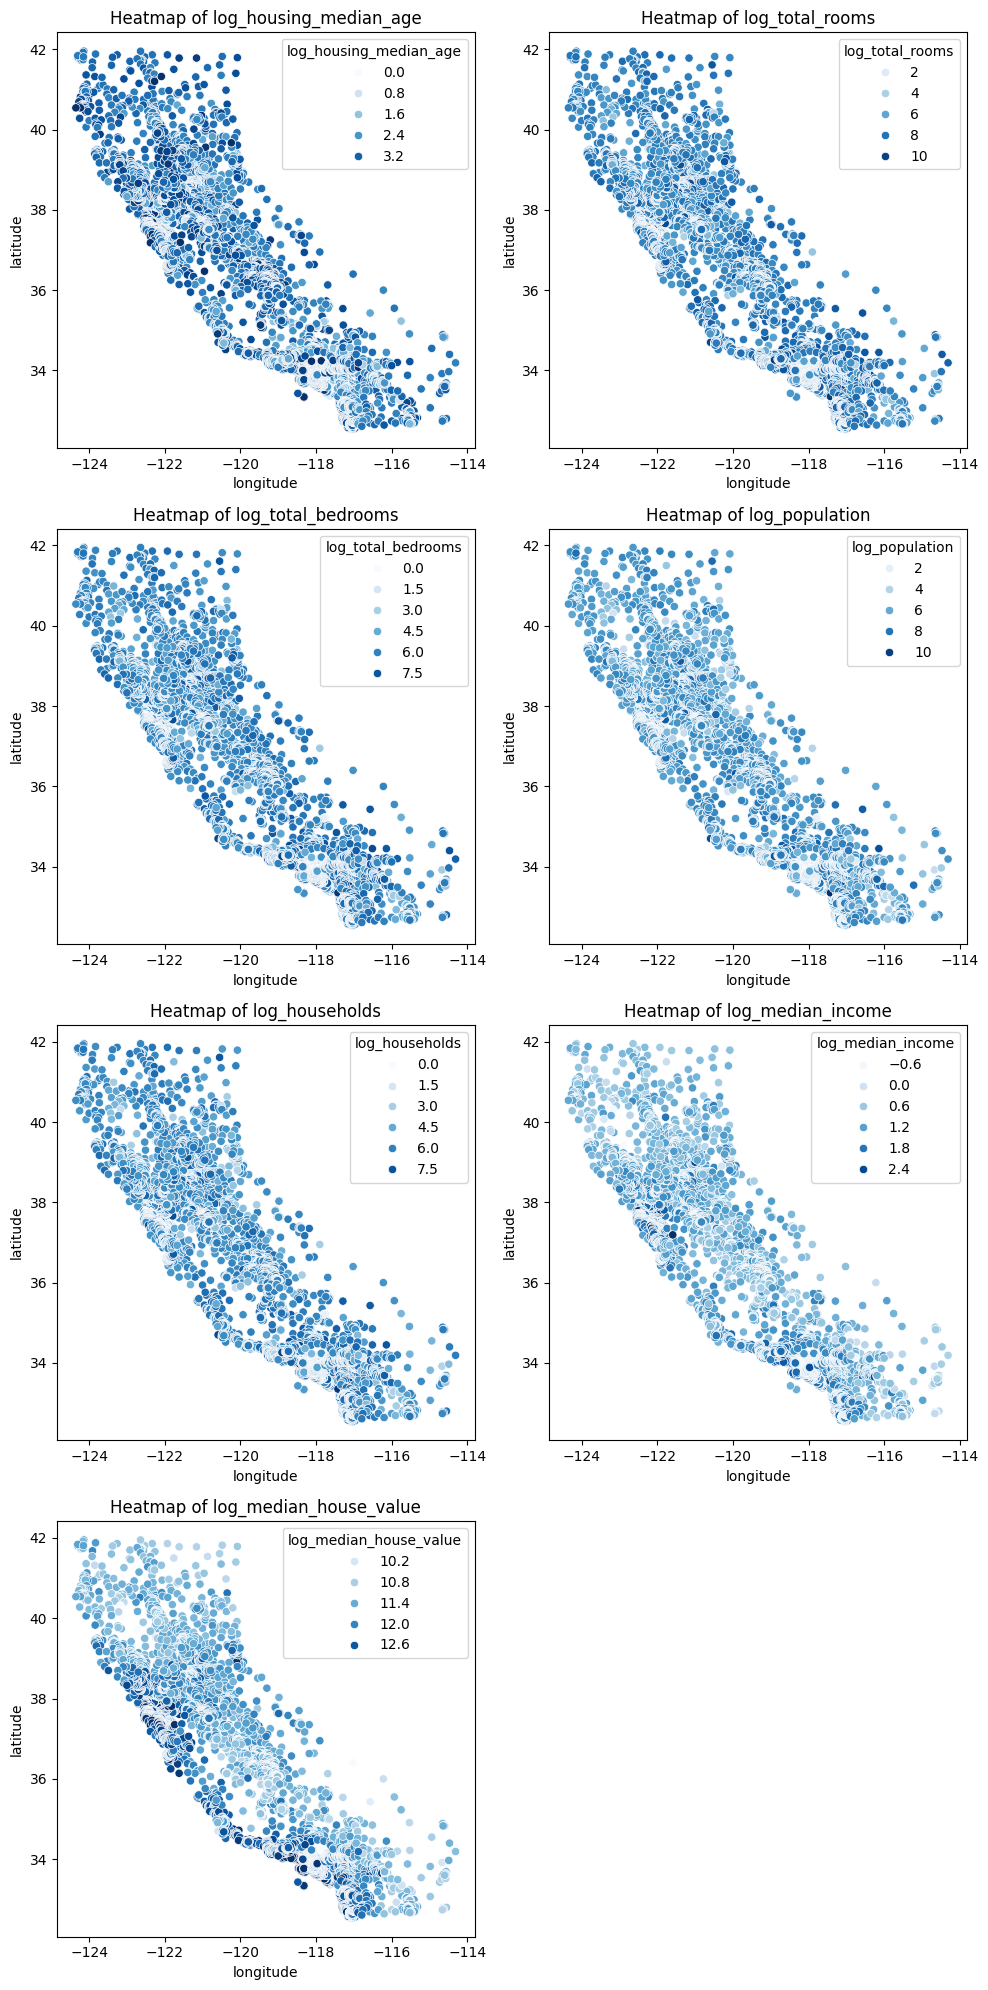

In [101]:
plt.figure(figsize=(10, 20))

for i, col in enumerate(log_cols):

    plt.subplot(4, 2, i + 1)
    sns.scatterplot(data=california_housing_with_log_df, x='longitude', y='latitude', hue='log_' + col, palette='Blues')
    plt.title('Heatmap of ' + 'log_' + col)
    plt.xlabel('longitude')
    plt.ylabel('latitude')

plt.tight_layout()
plt.show()

### Analyze the distribution of the Median House Value with respect to Ocean Proximity

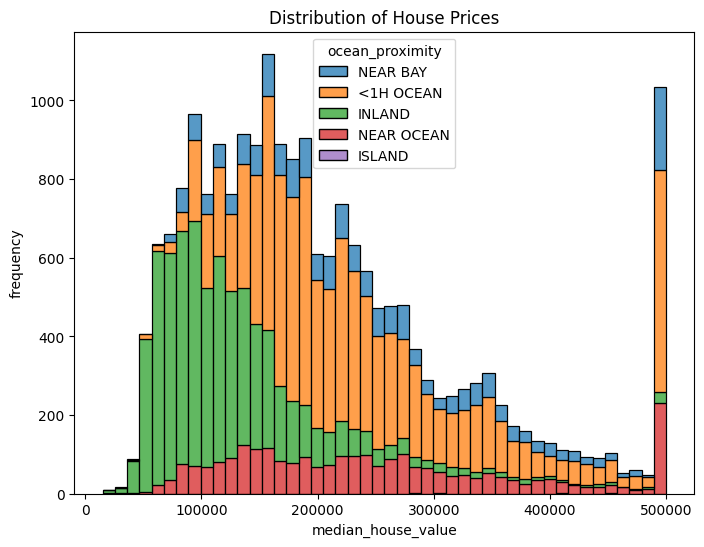

In [56]:
plt.figure(figsize=(8, 6))
sns.histplot(data=california_housing_df, x="median_house_value", hue="ocean_proximity", multiple="stack")
plt.title("Distribution of House Prices")
plt.xlabel("median_house_value")
plt.ylabel("frequency")
plt.show()

### Analyze data with box plots

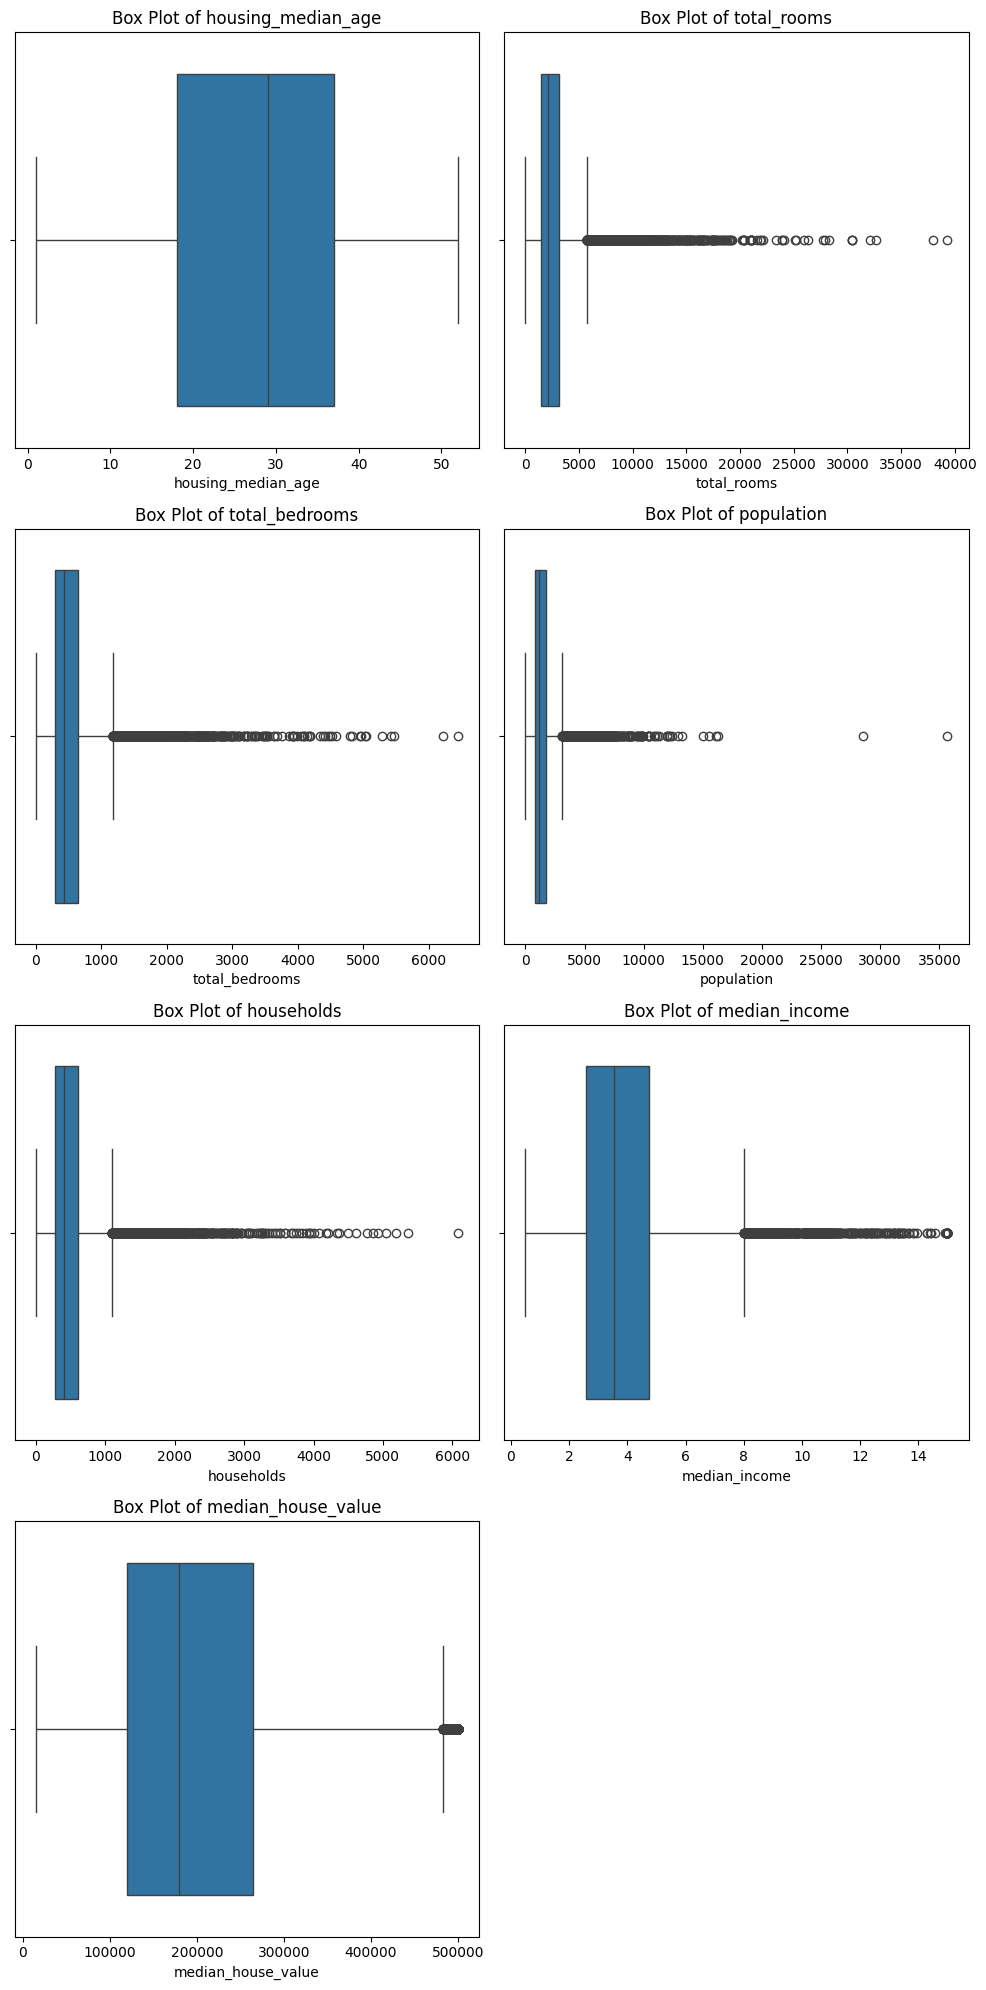

In [109]:
plt.figure(figsize=(10, 20))

for i, col in enumerate(log_cols):

    plt.subplot(4, 2, i + 1)
    sns.boxplot(data=california_housing_df, x=col)
    plt.title('Box Plot of ' + col)

plt.tight_layout()
plt.show()

### Generate polynomial features of some columns

In [146]:
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)

features_to_poly = ['housing_median_age', 'total_rooms', 'population', 'households', 'median_income']

poly_features = poly.fit_transform(california_housing_df[features_to_poly])

column_names = poly.get_feature_names_out(features_to_poly)

poly_column_names = column_names[len(features_to_poly):]

poly_features_df = pd.DataFrame(poly_features, columns=column_names)

poly_features_df

housing_median_age  total_rooms  population  households  median_income  \
0                    41.0        880.0       322.0       126.0         8.3252   
1                    21.0       7099.0      2401.0      1138.0         8.3014   
2                    52.0       1467.0       496.0       177.0         7.2574   
3                    52.0       1274.0       558.0       219.0         5.6431   
4                    52.0       1627.0       565.0       259.0         3.8462   
...                   ...          ...         ...         ...            ...   
20635                25.0       1665.0       845.0       330.0         1.5603   
20636                18.0        697.0       356.0       114.0         2.5568   
20637                17.0       2254.0      1007.0       433.0         1.7000   
20638                18.0       1860.0       741.0       349.0         1.8672   
20639                16.0       2785.0      1387.0       530.0         2.3886   

       housing_median_age^2  housing_median_age total_rooms  \
0                    1681.0                         36080.0   
1                     441.0                        149079.0   
2                    2704.0                         76284.0   
3                    2704.0                         66248.0   
4                    2704.0                         84604.0   
...                     ...                             ...   
20635                 625.0                         41625.0   
20636                 324.0                         12546.0   
20637                 289.0                         38318.0   
20638                 324.0                         33480.0   
20639                 256.0                         44560.0   

       housing_median_age population  housing_median_age households  \
0                            13202.0                         5166.0   
1                            50421.0                        23898.0   
2                            25792.0                         9204.0   
3                            29016.0                        11388.0   
4                            29380.0                        13468.0   
...                              ...                            ...   
20635                        21125.0                         8250.0   
20636                         6408.0                         2052.0   
20637                        17119.0                         7361.0   
20638                        13338.0                         6282.0   
20639                        22192.0                         8480.0   

       housing_median_age median_income  total_rooms^2  \
0                              341.3332       774400.0   
1                              174.3294     50395801.0   
2                              377.3848      2152089.0   
3                              293.4412      1623076.0   
4                              200.0024      2647129.0   
...                                 ...            ...   
20635                           39.0075      2772225.0   
20636                           46.0224       485809.0   
20637                           28.9000      5080516.0   
20638                           33.6096      3459600.0   
20639                           38.2176      7756225.0   

       total_rooms population  total_rooms households  \
0                    283360.0                110880.0   
1                  17044699.0               8078662.0   
2                    727632.0                259659.0   
3                    710892.0                279006.0   
4                    919255.0                421393.0   
...                       ...                     ...   
20635               1406925.0                549450.0   
20636                248132.0                 79458.0   
20637               2269778.0                975982.0   
20638               1378260.0                649140.0   
20639               3862795.0               1476050.0   

       total_rooms median_income  populati

### Store the dataset with new polynomial features

In [141]:
california_housing_with_poly_df = pd.concat([california_housing_df, poly_features_df], axis=1)

california_housing_with_poly_df.to_csv("data/california_housing_with_poly.csv", index=False)

yaml_content = {
    'name': 'California Housing Dataframe with Poly',
    'description': 'This is a dataframe containing the California Housing dataset with polynomial features.',
    'num_rows': len(california_housing_with_poly_df),
    'num_columns': len(california_housing_with_poly_df.columns),
    'columns': list(california_housing_with_poly_df.columns)
}

with open('data/california_housing_with_poly.desc.yaml', 'w') as file:
    yaml.dump(yaml_content, file, sort_keys=False)

california_housing_with_poly_df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  ...  total_rooms^2  total_rooms population  \
0            NEAR BAY  ...       774400.0                283360.0   
1            NEAR BAY  ...     50395801.0              17044699.0   
2            NEAR BAY  ...      2152089.0                727632.0   
3            NEAR BAY  ...      1623076.0                710892.0   
4            NEAR BAY  ...      2647129.0                919255.0   
...               ...  ...            ...                     ...   
20635          INLAND  ...      2772225.0               1406925.0   
20636          INLAND  ...       485809.0                248132.0   
20637          INLAND  ...      5080516.0               2269778.0   
20638          INLAND  ...      3459600.0               1378260.0   
20639          INLAND  ...      7756225.0               3862795.0   

       total_rooms households  total_rooms median_income  population^2  \
0                    110880.0                  7326.1760      103684.0   
1                   8078662.0                 58931.6386     5764801.0   
2                    259659.0                 10646.6058      246016.0   
3                    279006.0                  7189.3094      311364.0   
4                    421393.0                  6257.7674      319225.0   
...                       ...                        ...           ...   
20635                549450.0                  2597.8995      714025.0   
20636                 79458.0                  1782.0896      126736.0   
20637                975982.0                  3831.8000     1014049.0   
20638                649140.0                  3472.9920      549081.0   
20639               1476050.0                  6652.2510     1923769.0   

       population households  population median_income  households^2  \
0                    40572.0                 2680.7144       15876.0   
1                  2732338.0                19931.6614     1295044.0   
2                    87792.0                 3599.6704       31329.0   
3                   122202.0                 3148.8498       47961.0   
4                   146335.0                 2173.1030       67081.0   
...                      ...                       ...           ...   
20635              

### Make Principal Component Analysis (PCA) of some columns and plot the results

Text(0, 0.5, 'PCA2')

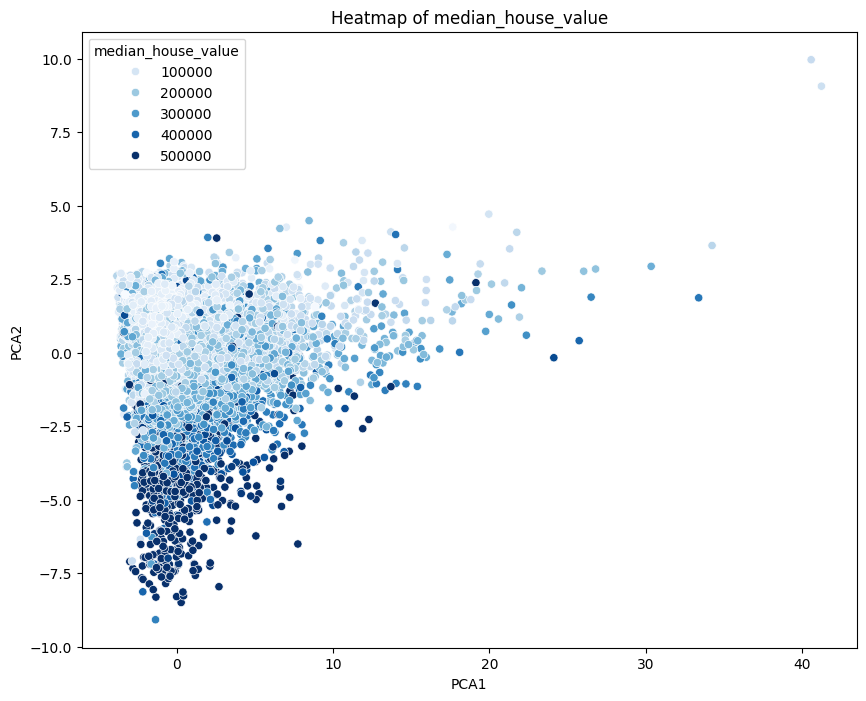

In [172]:
pca_columns_names = ['housing_median_age', 'total_rooms', 'population', 'households', 'median_income']

pca_transformer = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('pca', PCA(n_components=2))
])

pca_features = pca_transformer.fit_transform(california_housing_with_poly_df[pca_columns_names])

california_housing_with_pca_df = california_housing_with_poly_df.copy()

california_housing_with_pca_df['PCA1'] = pca_features[:, 0]
california_housing_with_pca_df['PCA2'] = pca_features[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(data=california_housing_with_pca_df, x='PCA1', y='PCA2', hue='median_house_value', palette='Blues')
plt.title('Heatmap of median_house_value')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

### Transform Ocean Proximity column into one-hot encoding

In [176]:
california_housing_with_one_hot_df = pd.get_dummies(california_housing_with_poly_df, columns=['ocean_proximity'])

california_housing_with_one_hot_df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

       housing_median_age  ...  population households  \
0                    41.0  ...                40572.0   
1                    21.0  ...              2732338.0   
2                    52.0  ...                87792.0   
3                    52.0  ...               122202.0   
4                    52.0  ...               146335.0   
...                   ...  ...                    ...   
20635                25.0  ...               278850.0   
20636                18.0  ...                40584.0   
20637                17.0  ...               436031.0   
20638                18.0  ...               258609.0   
20639                16.0  ...               735110.0   

       population median_income  households^2  households median_income  \
0                     2680.7144       15876.0                 1048.9752   
1                    19931.6614     1295044.0                 9446.9932   
2                     3599.6704       31329.0                 1284.5598   
3                     3148.8498       47961.0                 1235.8389   
4                     2173.1030       67081.0                  996.1658   
...                         ...           ...                       ...   
20635                 1318.4535      108900.0                  514.8990   
20636                  910.2208       12996.0                  291.4752   
20637                 1711.9000      187489.0                  736.1000   
20638                 1383.5952      121801.0                  651.6528   
20639                 3312.9882      280900.0                 1265.9580   

       median_income^2  ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0            69.308955                          0                       0   
1            68.913242                          0                       0   
2            52.669855                          0                       0   
3            31.844578                          0                       0   
4            14.793254                          0                       0   
...                ...                        ...                     ...   
20635         2.434536                          0                       1   
20636         6.537226                 

### Store the dataset with new one-hot encoding

In [177]:
california_housing_with_one_hot_df.to_csv("data/california_housing_with_one_hot.csv", index=False)

yaml_content = {
    'name': 'California Housing Dataframe with One Hot',
    'description': 'This is a dataframe containing the California Housing dataset with one hot encoding.',
    'num_rows': len(california_housing_with_one_hot_df),
    'num_columns': len(california_housing_with_one_hot_df.columns),
    'columns': list(california_housing_with_one_hot_df.columns)
}

with open('data/california_housing_with_one_hot.desc.yaml', 'w') as file:
    yaml.dump(yaml_content, file, sort_keys=False)

### Make another PCA with new one-hot encoding columns

Text(0, 0.5, 'PCA2')

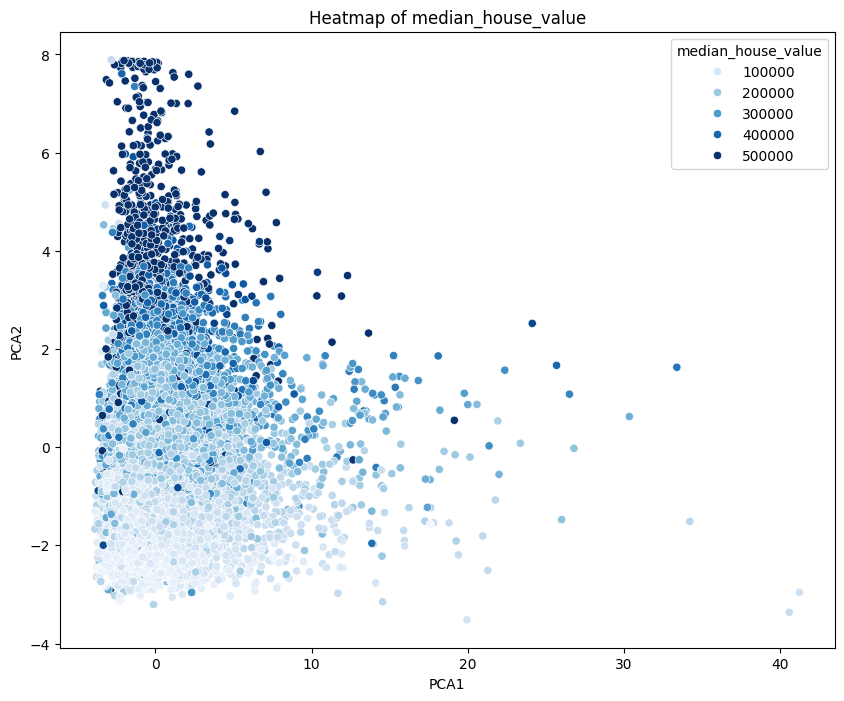

In [181]:
pca_columns_names = ['housing_median_age',
                     'total_rooms',
                     'population',
                     'households',
                     'median_income',
                     'ocean_proximity_<1H OCEAN',
                     'ocean_proximity_INLAND',
                     'ocean_proximity_ISLAND',
                     'ocean_proximity_NEAR BAY',
                     'ocean_proximity_NEAR OCEAN']

pca_transformer = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('pca', PCA(n_components=2))
])

pca_features = pca_transformer.fit_transform(california_housing_with_one_hot_df[pca_columns_names])

california_housing_with_pca_df = california_housing_with_poly_df.copy()

california_housing_with_pca_df['PCA1'] = pca_features[:, 0]
california_housing_with_pca_df['PCA2'] = pca_features[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(data=california_housing_with_pca_df, x='PCA1', y='PCA2', hue='median_house_value', palette='Blues')
plt.title('Heatmap of median_house_value')
plt.xlabel('PCA1')
plt.ylabel('PCA2')